# 2) Sorting Algorithms

---

## 1. Quick Sort

We will take a look at the Quick Sort as our third algorithm. Just as the Merge Sort it is a divide and conquer algorithm.
The merge sort split an array in two smaller until the sorting of this array is trival and then merge the sorted array in a new array while keeping the sorting property. Meaning that most of the cost is spent in merging than in dividing. In the Quick Sort algorithm most of the cost is in the dividing part of the algorithm. Instead of spliting in two unsorted array the Quick Sort split in two array such as every element in the first array is smaller than every element in the second. The two arrays created this way will in most of the case have different size if we choose the delimiter randomly leading in a worst case scenario in $O(n^2)$. It is possible to always use the best pivot by using the median of the array. However, the time spent looking for the median doesn't worth the time wasted by randomly choosing a pivot in most of the cases.

Quick Sort had some improvement over the time, we will cover some of them and try to see which one perform the better in python.

## 2. Implementing Sorts

In [1]:
def select_sort(T):
    n=len(T)
    for i in range(n-1):
        mini=i
        for j in range(i+1,n):
            if(T[j]<T[mini]):
                mini=j
        if(mini!=i):
            k=T[i]
            T[i]=T[mini]
            T[mini]=k
    return T

def merge(A,B):
    maxA=len(A)
    maxB=len(B)
    c=[]
    a=0
    b=0
    while (a!=maxA and b!=maxB):
        if(A[a]<B[b]):
            c.append(A[a])
            a+=1
        else:
            c.append(B[b])
            b+=1

    while(a!=maxA):
        c.append(A[a])
        a+=1
        
    while(b!=maxB):
        c.append(B[b])
        b+=1
    
    return c

def merge_sort(data):
    n=len(data)
    if n>1 :
        D1=merge_sort(data[:n//2])
        D2=merge_sort(data[n//2:])
        return merge(D1,D2)
    return data
    
def quick_sort(data,start=0,end=None):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return
    
    p = (start + end)//2
    j = start
    s = data[end]
    data[end]=data[p]
    data[p] = s
    for i in range(start,end):
        if(data[i]<= data[end]):
            s=data[i]
            data[i] = data[j]
            data[j] = s
            j+=1
    p=j
    
    s = data[end]
    data[end]=data[p]
    data[p] = s
    
    quick_sort(data,start,p-1)
    quick_sort(data,p+1,end)
    return(data)

The `merge` function as been adapted to avoid trying to acces to undifined parts of B and A. The quick sort has been implemented using the lomuto partition scheme and both algorithms have been implemented naively in the sense that no specific consideration about the time cost of growing array or any possible optimisation by using specific python's behavior has been taken. 
## 3.  Numerical tests and optimisations
Now in order to test the functions we will need some other functions.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

def near(data, value):
    n = len(data)
    assert n > 0
    if(n == 1):
        return 0
    left = 0
    right = n - 1
    middle = 0
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    return middle

def createRandomSortedList(num,start = 1,end = None):
    if(end == None):
        end = start+num*10
    arr = [random.randint(start,end)]
    tmp = random.randint(start,end)
    assert end-start>num
    for x in range(num-1):
        i = near(arr,tmp)
        while arr[i]==tmp:
            tmp = random.randint(start,end)
            i=near(arr,tmp)
        if arr[i] > tmp:
            arr.insert(i,tmp)
        else:
            arr.insert(i+1,tmp)
    return arr

def createRandomUnSortedList(num, start = 1, end = None):
    if(end == None):
        end = start+num*10
    Sarr = createRandomSortedList(num,start,end)
    random.shuffle(Sarr)
    return Sarr

def logEmpty(n):
    i =0
    while i<n:
        n/=2
        i+=1

def benchmark(function_list,points,arg_provider,repeat:int = 10,warm=False,verbose_level=1):
    """ Record time taken by function to process argument given by `arg_provider` depending on the size of the problem/point.
    
    Parameters 
    ----------
    function_list : list of function
                    List of function to benchmark.
    points : list of int
             list of point reprensenting where to evaluate the functions or the size of the problem to give to the functions
    arg_provider : function, lambda or list of them
                   (list of) function(s) which take an integer in input and return a tuple or an array of args to get processed by the functions of `function_list`
                   if `arg_profider` is a unique function (or lambda) then all of the function in `function_list` will recieve the same arguments in the position
                   if `arg_profider` is a list then `len(arg_profider)` must be equal to `len(function_list)` each provider in the list will be called for the 
                   function of the same indice in `function_list`
    repeat : int
             number of time a measure is repeated for better accuracy
    warm : bool
           if `True` then a dummy function equal to the first function of `function_list` is runned (with correct argument) before other functions and not taken in account for final data
    verbose_level : int
                    define how much information about current computation will be displayed
                    1+ : a progress bar about general advencement on evalating functions on earch points
                    2+ : add progress bars about each repeatition of the diffrent functions.
    
    Returns
    ----------
    
    """
    
    def dumy_provider(n):
        return n
    
    def warm_fun(*args): # warming dummy function
        return function_list[1](*args)
    
    if(warm):
        function_list.insert(0,warm_fun)
        
        if isinstance(arg_provider,list) :
            arg_provider.insert(0,arg_provider[0])
        elif isinstance(arg_provider,tuple) :
            arg_provider = (arg_provider[0],*arg_provider)
        
    data={fun.__name__:{"y":[0]*len(points),"x":points} for fun in function_list}
    
    if verbose_level >0:
        pt_it = enumerate(tqdm(points,desc = "Evaluating function on given problem sizes/points "))
    else:
        pt_it = enumerate(points)
    
    for (i,v) in pt_it:
        
        if verbose_level > 1:
            rp_it = tqdm(range(repeat),desc="Reapeting mesure ")
        else :
            rp_it = range(repeat)
        
        for _ in rp_it :
            
            
            if isinstance(arg_provider,(list,tuple)):
                args = [arg_provider[j](v) for j in range(len(arg_provider))]
                
                for (j,fun) in enumerate(function_list):
                    data[fun.__name__]["y"][i] += timeit.timeit(lambda: fun(*(args[j])), number=1)
            else:
                args = arg_provider(v)
                
                for fun in function_list:
                    data[fun.__name__]["y"][i] += timeit.timeit(lambda: fun(*args), number=1)
            
        for fun in function_list:
            data[fun.__name__]["y"][i] /= repeat
    
    if(warm):
        function_list.remove(warm_fun)
        del data["warm_fun"]
        if isinstance(arg_provider,list) :
            del arg_provider[0]
    
    return data

def plot(data,transform=None,format=None):
    """ Plot all data to current plot
    
    Parameters
    ----------
    data : dict
           will have to be of form {curve_name_1:{x:[x1,x2..],y:[y1,y2..]},curve_name_2...}
           of optional `format` field can be added to each curve neasted dict
    transform : function or None
           plot transforming function called between the addition of two data set to the plot if provided. Must return a plotable object
    format : str or None
           formating to give by default for all curves creation. Will be overriden by the `format` key if present in curve's neasted dict
    Returns
    ---------
    last used plot.
    """
    
    plot = plt
    
    for name in data.keys():
        if "format" in data[name]:
            plot.plot(data[name]["x"],data[name]["y"],data[name][format],label = name)
        elif format != None:
            plot.plot(data[name]["x"],data[name]["y"],format,label = name)
        else:
            plot.plot(data[name]["x"],data[name]["y"],label = name)
        
        if (transform != None):
            plot = transform(plot)
    
    plot.legend()
    return plot

def linspace(min:int,max:int,number:int):
    return [int(x) for x in np.linspace(min,max,number)]

All of the following curves will be made using the `plotTime` function. This function allows different arguments depending on the size of the problem and redundant measures to improve accuracy. For each repetition of the mesure, new arguments are generated and arguments are shared by all of the tested functions during this repetition. 

In [3]:
array = createRandomUnSortedList(100000)

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [00:04<00:00, 10.55it/s] 


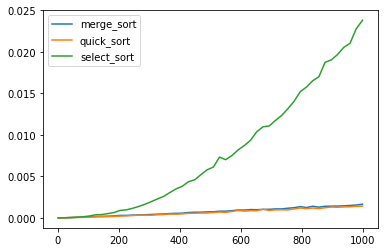

In [4]:
data = benchmark([merge_sort,quick_sort,select_sort],linspace(2,1000,50),lambda n:(array[:n],))
plot(data).show()

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [00:05<00:00,  9.33it/s]


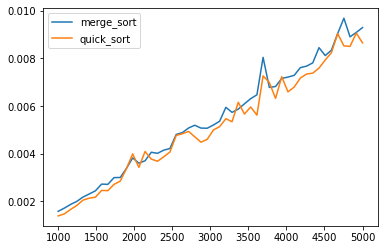

In [5]:
data = benchmark([merge_sort,quick_sort],linspace(1000,5000,50),lambda n:(array[:n],))
plot(data).show()

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]


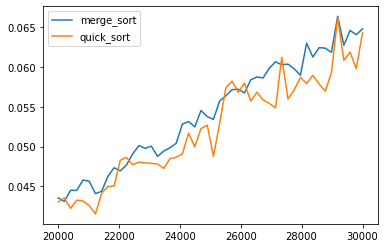

In [6]:
data = benchmark([merge_sort,quick_sort],linspace(20000,30000,50),lambda n:(array[:n],))
plot(data).show()

As we can see the selection sort is really inefficient compared to the merge sort and the quick sort. We can also notice that the quick sort is less stable and predictable than the merge sort. We will now try to improve our quick sort.

In [7]:
def quick_sort_hoare(data,start=0,end=None):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_hoare(data,start,j-1)
    quick_sort_hoare(data,j+1,end)
    return(data)

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [02:48<00:00,  3.37s/it]


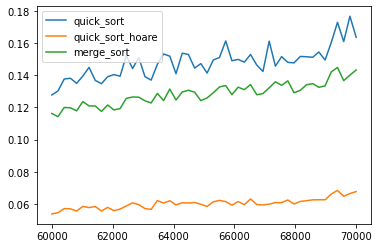

In [8]:
data = benchmark([quick_sort,quick_sort_hoare,merge_sort],linspace(60000,70000,50),lambda n:(array[:n],))
plot(data).show()

As we can see here, by simply changing the way we split our array in two, we improve our quick sort making it less chaotic and more time efficient than the merge sort.
The Hoare partition scheme used in this version has many advantages. First, it does three times less swaps on avarage than the previous version. This partition algorithm also produce better partition when some elements are equals to the pivot even if in our case, it doesn't append.

Another way of optimizing the quick sort is to replace it by another sort for sorter array.

In [9]:
def quick_sort_select(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return select_sort(data)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_select(data,start,j-1)
    quick_sort_select(data,j+1,end)
    return(data)

def quick_sort_merge(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return merge_sort(data)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_merge(data,start,j-1)
    quick_sort_merge(data,j+1,end)
    return(data)

def bubble_sort(data,start=0,n=None):
    if n == None:
        n = len(data)
    while n > 0:
        newn = 0
        for j in range(start+1,n):
            if(data[j-1]>data[j]):
                s=data[j]
                data[j]=data[j-1]
                data[j-1]=s
                newn=j
        n=newn
    return data

def quick_sort_bubble(data,start=0,end=None,threshold=10):
    if end == None:
        end = len(data)-1
    elif end >= len(data):
        end = len(data)-1
    if start >= end:
        return 
    if end-start <= threshold :
        return bubble_sort(data,start,end)
    
    p = data[(start + end)//2]
    i = start
    j = end
    
    while True :
        
        while data[i]<p :
            i+=1
        
        while data[j]>p:
            j-=1
        
        if i>=j:
            break
        
        s=data[i]
        data[i]=data[j]
        data[j]=s
    
    quick_sort_bubble(data,start,j)
    quick_sort_bubble(data,j+1,end)
    return(data)

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [06:13<00:00,  7.48s/it]


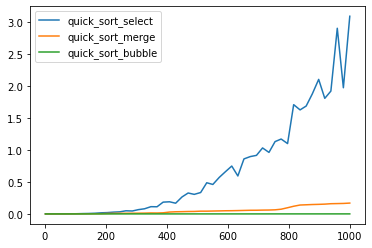

In [10]:
data = benchmark([quick_sort_select,quick_sort_merge,quick_sort_bubble],linspace(2,1000,50),lambda n:(array[:n],))
plot(data).show()

As we can see here, the version using the selection sort is way heavier than the two others but more surprisingly the bubble sort version competes with the merge sort version whereas the bubble sort is known for it's inefficiency. But it's not like they are equivalent on low value of $n$ but when $n$ goes larger, the merge version gain in effectiveness, it's the exact opposite. 

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


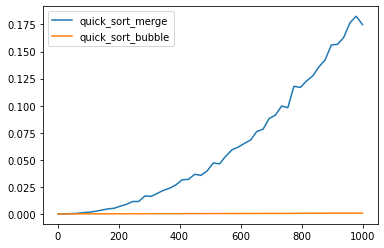

In [11]:
data = benchmark([quick_sort_merge,quick_sort_bubble],linspace(2,1000,50),lambda n:(array[:n],))
plot(data).show()

Now we have the best hybride we can compare it, with the original quick sort. As we can see here the bubble hybride is better than the original. The difference is not incredible. But still, there and really impressive knowing how inefficient is the bubble sort.

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [00:57<00:00,  1.14s/it]


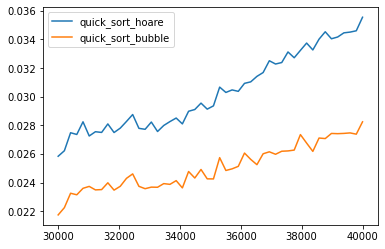

In [12]:
data = benchmark([quick_sort_hoare,quick_sort_bubble],linspace(30000,40000,50),lambda n:(array[:n],),warm = True)
plot(data).show()

Now, the question is: why is the bubble hybride better than the original ?  
This question have two answers that could explain the current curve. 
- The first explanation is that the bubble sort comes after the quick sort already did a lot of works and made the array "$K$ sorted", meaning all the elements are at most at $k$ place away from where they should be. Knowing this, some sort can take advantages of this and sorting on one of their best case most of the time.
- The second explanation is that those sorts do less work on smaller arrays than the quick sort which starts making a lot of swaps when the array goes smaller compared to the first iteration.
  
All of those elements reduce the cost of the quick sort. This final graph will help us seeing how some simple changes to a function can lead to sensible improvement.

Evaluating function on given problem sizes/points : 100%|██████████| 50/50 [03:30<00:00,  4.21s/it]


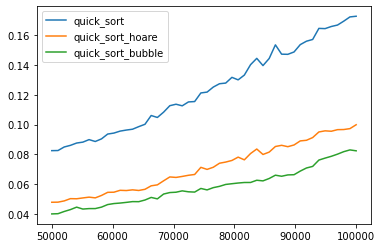

In [13]:
data = benchmark([quick_sort,quick_sort_hoare,quick_sort_bubble],linspace(50000,100000,50),lambda n:(array[:n],),warm = True)
plot(data).show()